In [49]:
# Import necessary libraries for tensor computations and deep learning
import torch  # PyTorch library for tensor operations and deep learning
import torch.nn as nn  # Neural network module for building and training neural networks
import torch.optim as optim  # Module that provides optimization algorithms for training models
import torchvision  # Library that includes popular datasets, model architectures, and image transformation utilities


In [50]:
# Load MNIST data with specified transformations
transform = torchvision.transforms.Compose([
    # Convert images to PyTorch tensors
    torchvision.transforms.ToTensor(),
    # Normalize the tensor images to have a mean of 0.5 and a standard deviation of 0.5
    torchvision.transforms.Normalize((0.5,), (0.5,)),
])


In [51]:
# Create training and test datasets for the MNIST dataset
mnist_train = torchvision.datasets.MNIST(
    'data',         # Directory where the dataset will be stored
    train=True,     # Indicates this is the training dataset
    download=True,  # Downloads the dataset if it is not already present
    transform=transform  # Applies the specified transformations to the data
)

mnist_test = torchvision.datasets.MNIST(
    'data',         # Directory where the dataset will be stored
    train=False,    # Indicates this is the test dataset
    download=True,  # Downloads the dataset if it is not already present
    transform=transform  # Applies the specified transformations to the data
)


In [52]:
# Data loaders for batching the training and test datasets
train_loader = torch.utils.data.DataLoader(
    mnist_train,     # The training dataset
    shuffle=True,    # Shuffle the data at every epoch to ensure random sampling
    batch_size=100   # Number of samples per batch
)

test_loader = torch.utils.data.DataLoader(
    mnist_test,      # The test dataset
    shuffle=True,     # Shuffle the data for random sampling during testing
    batch_size=100    # Number of samples per batch
)


In [53]:
# Define the LeNet5 model architecture
class LeNet5(nn.Module):
    def __init__(self):
        super().__init__()  # Initialize the parent class (nn.Module)

        # Define the first convolutional layer: 
        # 1 input channel (grayscale), 6 output channels, 5x5 kernel, stride of 1, and padding of 2
        self.conv_layer1 = nn.Conv2d(1, 6, kernel_size=5, stride=1, padding=2)
        self.activation1 = nn.Tanh()  # Activation function after first convolution
        self.pool_layer1 = nn.AvgPool2d(kernel_size=2, stride=2)  # Average pooling layer

        # Define the second convolutional layer: 
        # 6 input channels, 16 output channels, 5x5 kernel, stride of 1, and no padding
        self.conv_layer2 = nn.Conv2d(6, 16, kernel_size=5, stride=1, padding=0)
        self.activation2 = nn.Tanh()  # Activation function after second convolution
        self.pool_layer2 = nn.AvgPool2d(kernel_size=2, stride=2)  # Average pooling layer

        # Define the third convolutional layer: 
        # 16 input channels, 120 output channels, 5x5 kernel, and no padding
        self.conv_layer3 = nn.Conv2d(16, 120, kernel_size=5, stride=1, padding=0)
        self.activation3 = nn.Tanh()  # Activation function after third convolution

        # Flatten the output for fully connected layers
        self.flatten = nn.Flatten()
        self.fc_layer1 = nn.Linear(120, 84)  # Fully connected layer from 120 to 84 neurons
        self.activation4 = nn.Tanh()  # Activation function after the first fully connected layer
        self.fc_layer2 = nn.Linear(84, 10)  # Final output layer: 84 neurons to 10 classes

    def forward(self, x):
        # Forward pass through the network
        # Input size: 1x28x28, output size after conv_layer1: 6x28x28
        x = self.activation1(self.conv_layer1(x))
        # Input size: 6x28x28, output size after pool_layer1: 6x14x14
        x = self.pool_layer1(x)
        # Input size: 6x14x14, output size after conv_layer2: 16x10x10
        x = self.activation2(self.conv_layer2(x))
        # Input size: 16x10x10, output size after pool_layer2: 16x5x5
        x = self.pool_layer2(x)
        # Input size: 16x5x5, output size after conv_layer3: 120x1x1
        x = self.activation3(self.conv_layer3(x))
        # Flatten the output and pass through fully connected layers
        x = self.activation4(self.fc_layer1(self.flatten(x)))  # Output after first fc layer
        x = self.fc_layer2(x)  # Final output layer
        return x  # Return the output logits


In [54]:
# Instantiate the LeNet5 model
lenet_model = LeNet5()  # Create an instance of the LeNet5 class, initializing the model architecture


In [55]:
# Instantiate the LeNet5 model
lenet_model = LeNet5()  # Create an instance of the LeNet5 class

# Initialize the Adam optimizer for model parameters
optimizer = optim.Adam(lenet_model.parameters())  # Set up the Adam optimizer to update model weights during training

# Define the loss function for multi-class classification
loss_function = nn.CrossEntropyLoss()  # Use CrossEntropyLoss to compute the loss for multi-class classification problems

# Set the number of training epochs
num_epochs = 10  # Define how many times the entire training dataset will pass through the model during training


In [56]:
# Training loop for multiple epochs
for epoch in range(1, num_epochs + 1):
    lenet_model.train()  # Activate training mode for the model
    total_loss = 0.0  # Initialize total loss for the epoch
    
    # Training Phase
    for batch_data, batch_labels in train_loader:
        # Forward pass: compute predictions for the current batch
        predictions = lenet_model(batch_data)
        
        # Compute the loss using the predicted values and the true labels
        loss = loss_function(predictions, batch_labels)
        
        # Reset gradients from the previous training step
        optimizer.zero_grad()
        
        # Backward pass: compute gradients based on the loss
        loss.backward()
        
        # Update model parameters using the optimizer
        optimizer.step()
        
        # Accumulate the total loss for this epoch
        total_loss += loss.item()

    # Calculate the average loss for the epoch
    average_loss = total_loss / len(train_loader)
    
    # Validation phase
    lenet_model.eval()  # Set the model to evaluation mode (disables dropout, etc.)
    accuracy = 0  # Initialize accuracy counter
    total_samples = 0  # Initialize total sample counter

    # Loop over mini-batches in the test set to evaluate model accuracy
    for batch_data, batch_labels in test_loader:
        predictions = lenet_model(batch_data)  # Forward pass for the test set
        # Calculate the number of correct predictions
        accuracy += (torch.argmax(predictions, 1) == batch_labels).float().sum()
        total_samples += len(batch_labels)  # Count the total number of samples
    
    # Calculate overall accuracy for this epoch
    accuracy = accuracy / total_samples
    # Print epoch number, average loss, and model accuracy
    print("Epoch %d: Loss %.4f, Model Accuracy %.2f%%" % (epoch, average_loss, accuracy * 100))


Epoch 1: Loss 0.3236, Model Accuracy 96.19%
Epoch 2: Loss 0.0956, Model Accuracy 97.58%
Epoch 3: Loss 0.0646, Model Accuracy 97.88%
Epoch 4: Loss 0.0507, Model Accuracy 98.36%
Epoch 5: Loss 0.0391, Model Accuracy 98.26%
Epoch 6: Loss 0.0337, Model Accuracy 98.14%
Epoch 7: Loss 0.0287, Model Accuracy 98.32%
Epoch 8: Loss 0.0240, Model Accuracy 98.51%
Epoch 9: Loss 0.0224, Model Accuracy 98.35%
Epoch 10: Loss 0.0185, Model Accuracy 98.49%


In [57]:
lenet_model.eval()
overall_accuracy = 0
total_samples = 0

with torch.no_grad():
    for batch_data, batch_labels in test_loader:
        predictions = lenet_model(batch_data)
        overall_accuracy += (torch.argmax(predictions, 1) == batch_labels).float().sum()
        total_samples += len(batch_labels)

overall_accuracy = overall_accuracy / total_samples
print(f"Overall Test Accuracy: {overall_accuracy * 100:.2f}%")

Overall Test Accuracy: 98.49%


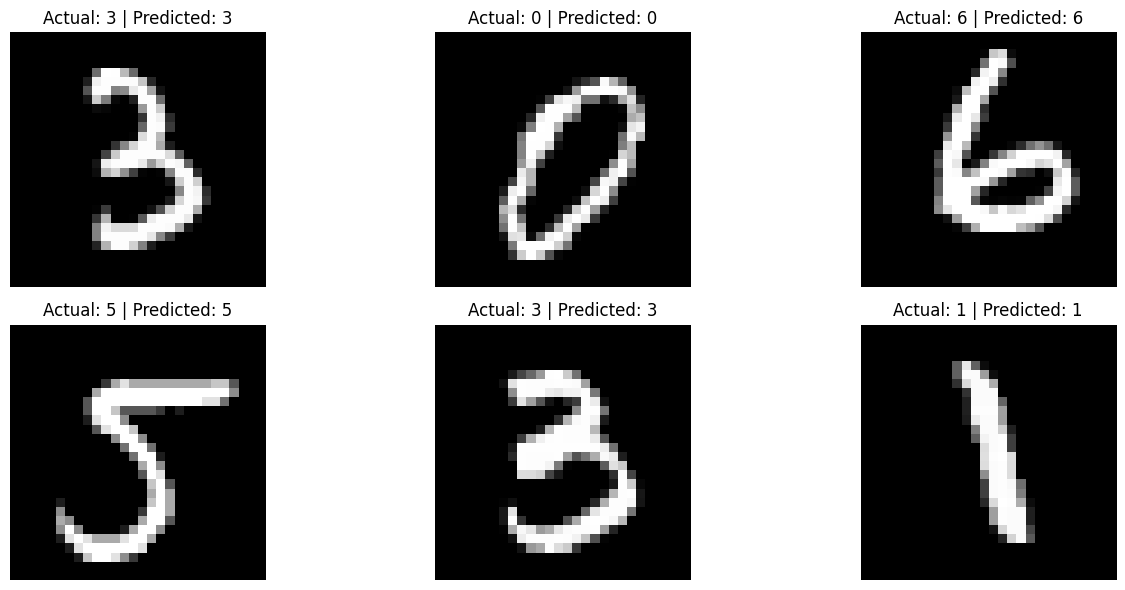

In [61]:
import matplotlib.pyplot as plt  # For plotting images
import torch  # PyTorch for tensor operations and neural networks

# Function to display model predictions on a sample of test data
def display_predictions(lenet_model, test_loader, num_samples=6):
    # Set the model to evaluation mode, turning off dropout, batch norm, etc.
    lenet_model.eval()  
    
    # Fetch a batch of test images and their labels from the data loader
    data_iter = iter(test_loader)
    images, labels = next(data_iter)

    # Disable gradient calculation to save memory and computations during inference
    with torch.no_grad():
        logits = lenet_model(images)  # Forward pass to get raw model predictions (logits)
        predicted_classes = torch.argmax(logits, dim=1)  # Get predicted class indices by finding max logits

    # Setup the plot grid to display images and their predictions
    fig, axes = plt.subplots(2, num_samples // 2, figsize=(14, 6))
    axes_flat = axes.flatten()  # Flatten the axes array for easy access to each subplot

    # Loop through each sample to display its image and prediction
    for idx in range(num_samples):
        image = images[idx].cpu().numpy().squeeze()  # Move image to CPU, convert to NumPy, and remove channel dimension
        axes_flat[idx].imshow(image, cmap='gray')  # Display image in grayscale
        # Set the title with actual and predicted class labels
        axes_flat[idx].set_title(f"Actual: {labels[idx].item()} | Predicted: {predicted_classes[idx].item()}")
        axes_flat[idx].axis('off')  # Turn off axis for a cleaner view

    plt.tight_layout()  # Automatically adjust spacing for the plot
    plt.show()  # Render the plot

# Call the function to visualize predictions from the model on test data
display_predictions(lenet_model, test_loader)
